### A comparision of box plots and violin plots in Python

Below I write code in Python by interacting with two modules — pandas and seaborn. [Pandas](http://pandas.pydata.org/) is an Excel-like module for big data and enhanced manipulation. [Seaborn](https://seaborn.pydata.org/) is a tool for creating beautiful charts and visuals. If you gain comfort with Python and these modules, machine learning is not far away (look to a module called [scikit-learn](http://scikit-learn.org/stable/) and [this tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) to get started).

This analysis is performed in a Jupyter notebook. It is an excellent tool for exploratory data analysis becuase you can seemlessly interlace code with visuals and comments.

In [1]:
# this is a code block
# comments are initiaed with a '#' symbol
# statements not led with a '#' are interpreted as code
num_plts = 1 + 1  # a Python integer type
plt_types = ['box', 'violin']  # a Python list type
print("We will use a bit of code to generate {} plots.".format(num_plts))
print("A {} plot and a {} plot.".format(plt_types[0], plt_types[1]))

We will use a bit of code to generate 2 plots.
A box plot and a violin plot.


In [2]:
# import helpful modules
import pandas as pd  # pd is an alias for pandas we can reference to call pandas functions in our code
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load the Excel file
xlsx = pd.ExcelFile('FracStats_JobList_Summer2017.xlsx')
# load the selected tab from the Excel workbook into a pandas dataframe
df_frac = xlsx.parse('FracStats')

relevant_cols = ['Well', 'Formation', 'Fluid Type', '100 Mesh, White [lbs]', 
                '30/50, White [lbs]', '40/70, White [lbs]', '20/40, White [lbs]', 
                'Total Proppant [lbs].1', 'Screen Out']

df_frac = df_frac[relevant_cols]

df_frac['Formation'].replace({'Wolfcamp ': 'Wolfcamp'}, inplace=True)
df_frac.rename(columns = {'Total Proppant [lbs].1':'Total Proppant [lbs]'}, inplace=True)
df_frac.fillna(0, inplace=True)

In [4]:
# print the first five rows of the dataframe
df_frac.head()

,Well,Formation,Fluid Type,"100 Mesh, White [lbs]","30/50, White [lbs]","40/70, White [lbs]","20/40, White [lbs]",Total Proppant [lbs],Screen Out
0,P2,Niobrara,Gel,7412.0,0.0,0.0,163021.0,170433.0,No
1,P2,Niobrara,Gel,6165.0,0.0,0.0,213117.0,219282.0,No
2,P2,Niobrara,Gel,5880.0,0.0,0.0,205057.0,210937.0,No
3,P2,Niobrara,Gel,6607.0,0.0,0.0,208468.0,215075.0,No
4,P2,Niobrara,Gel,6461.0,0.0,0.0,203365.0,209826.0,No


Let's create another dataframe where the following conditions for a stage are met:
1. Fluid type is Gel.
2. Not screened out or cut. 

In [5]:
df_gel = df_frac.loc[(df_frac['Fluid Type'] == 'Gel') & (df_frac['Screen Out'] == 'No')]

In [6]:
print("{} stages across {} wells.".format(df_gel.shape[0], len(df_gel['Well'].unique())))

590 stages across 22 wells.


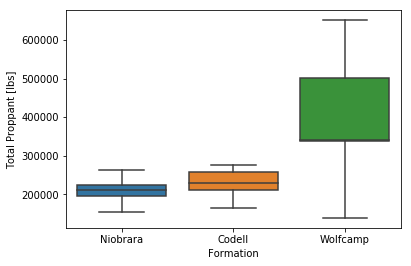

In [7]:
# plot the distribution of total sand pumped by formation in a box plot
sns.boxplot(data=df_gel, x='Formation', y='Total Proppant [lbs]', showfliers=False);

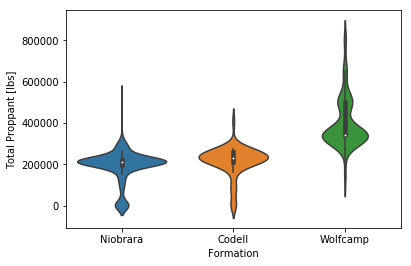

In [8]:
# plot the distribution of total sand pumped by formation in a violin plot
sns.violinplot(data=df_gel, x='Formation', y='Total Proppant [lbs]');

In [36]:
from matplotlib.ticker import FuncFormatter
sns.set_style("whitegrid")
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16

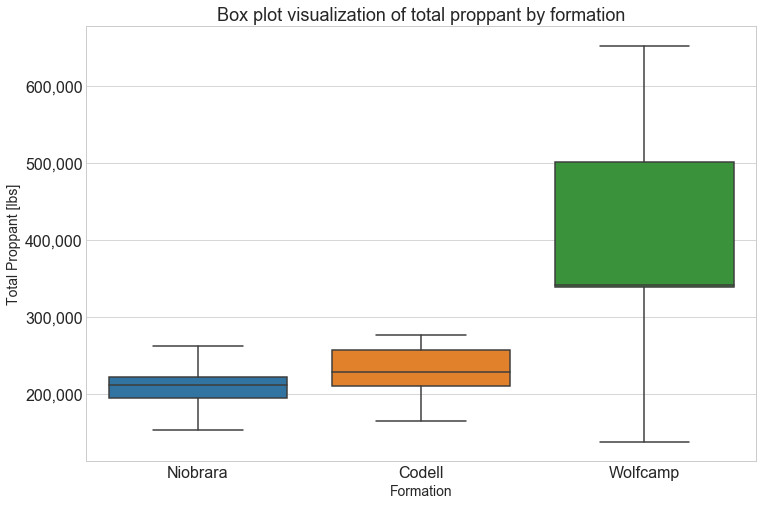

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_gel, x='Formation', y='Total Proppant [lbs]', showfliers=False);
plt.title('Box plot visualization of total proppant by formation')
plt.suptitle('')
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.ylabel('Total Proppant [lbs]')
plt.savefig('box.png', dpi=400)

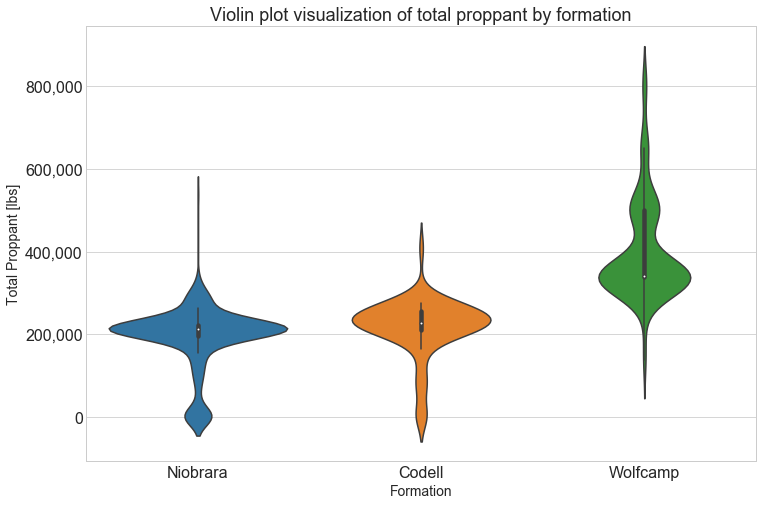

In [47]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_gel, x='Formation', y='Total Proppant [lbs]')
plt.title('Violin plot visualization of total proppant by formation')
ax = plt.subplot()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.savefig('violin.png', dpi=400)